### Bài toán cái túi (Knapsack Problem)
Đầu vào:
- Danh sách giá trị của từng đồ vật $profit$
- Danh sách cân nặng tương ứng $weight$
- Trọng lượng có thể mang theo $capacity$  

Đầu ra:
- Phương án mang đồ vật

In [139]:
import numpy as np # type: ignore
import random
import copy
import matplotlib.pyplot as plt # type: ignore

In [140]:
class Problem:
    def __init__(self, profit, weight, capacity):
        self.profit = profit
        self.weight = weight
        self.capacity = capacity


In [141]:
def get_fitness(chromosome, problem : Problem):
    total_profit = np.sum(binary_chromosome * problem.profit)
    total_weight = np.sum(binary_chromosome * problem.weight)
    if total_weight > problem.capacity:
        return 0
    else:
        return total_profit

In [142]:
class Individual:
    def __init__(self):
        self.chromosome = None
        self.fitness = None

    def gen_indi(self, problem : Problem):
        num_item = problem.profit.size
        self.chromosome = np.random.choice([0, 1], size = num_item)

    def cal_fitness(self, problem : Problem):
        self.fitness = get_fitness(self.chromosome, problem)

    def clone(self):
        return copy.deepcopy(self)

    def __repr__(self):
        return f"chromosome={self.chromosome}, fitness={self.fitness}"


In [143]:
def crossover(parent1, parent2, problem : Problem, Pc):
    off1 = Individual()
    off2 = Individual()

    off1.chromosome = np.copy(parent1.chromosome)
    off2.chromosome = np.copy(parent2.chromosome)

    for i in range(len(parent1.chromosome)):
        if np.random.rand() <= Pc:
            # Swap genes between offspring
            temp = off1.chromosome[i]
            off1.chromosome[i] = off2.chromosome[i]
            off2.chromosome[i] = temp
    return off1.clone(), off2.clone()

In [144]:

# Flip bit mutation
def mutation(indi, Pm):
    chr = indi.chromosome
    for i in range(len(chr)):
        if np.random.rand() <= Pm:
            chr[i] = 1 - chr[i]
    indi.chromosome = chr
    return indi.clone()

In [145]:
class Population:
    def __init__(self, pop_size, problem : Problem):
        self.pop_size = pop_size
        self.list_indi = []
        self.problem = problem

    def genPop(self):
        for i in range(self.pop_size):
            indi = Individual()
            indi.gen_indi(self.problem)
            indi.cal_fitness(self.problem)
            self.list_indi.append(indi)

    def show(self):
        for i in range(len(self.list_indi)):
            print(f"Individual {i}: {self.list_indi[i]}")

In [146]:
def selection(list, k = 2):
    tour1 = random.sample(list, k)
    tour2 = random.sample(list, k)
    x = max(tour1, key=lambda indi: indi.fitness)
    y = max(tour2, key=lambda indi: indi.fitness)
    return x.clone(), y.clone()

In [147]:
def survival_selection(list, pop_size):
    list = sorted(list, key=lambda indi: indi.fitness, reverse=True)
    list = list[0: pop_size]
    return list

In [148]:
def GA(problem, pop_size, max_gen, p_c, p_m):
    pop = Population(pop_size, problem)
    pop.genPop()
    history = []
    for i in range(max_gen):
        child = []
        while (len(child) < pop_size):
            p1, p2 = selection(pop.list_indi)
            if np.random.rand() <= p_c:
                c1, c2 = crossover(p1, p2, problem, Pc)
                c1.cal_fitness(problem)
                c2.cal_fitness(problem)
                child.append(c1)
                child.append(c2)
            if np.random.rand() <= p_m:
                p1 = mutation(p1, Pm)
                p2 = mutation(p2, Pm)
                p1.cal_fitness(problem)
                p2.cal_fitness(problem)
                child.append(p1)
                child.append(p2)
        pop.list_indi = survival_selection(pop.list_indi + child, pop_size)
        history.append(pop.list_indi[0].fitness)
    solution = pop.list_indi[0]
    return history, solution

In [149]:
# setup
profit = np.array([6.62, 11.21, 16.05, 9.52, 9.22, 10.85, 12.53, 10.95, 17.37, 7.96])
weight = np.array([7.11, 5.44, 10.86, 3.82, 12.96, 8.13, 3.78, 12.49, 13.53, 15.47])
capacity = 65.17
# profit = np.array([3, 6, 8, 10, 15])
# weight = np.array([2, 3, 3, 5, 8])
# capacity = 10
problem = Problem(profit, weight, capacity)

pop_size = 100
max_gen = 500
Pc = 0.8
Pm = 1.0

#start
fitness_history, solution = GA(problem, pop_size, max_gen, Pc, Pm)
%timeit GA(problem, pop_size, max_gen, Pc, Pm)

#show
for i in range(len(fitness_history)):
    print(f"Generation {i}: best_fitness: {fitness_history[i]:.2f}")

2.7 s ± 506 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Generation 0: best_fitness: 80.84
Generation 1: best_fitness: 80.84
Generation 2: best_fitness: 80.84
Generation 3: best_fitness: 83.89
Generation 4: best_fitness: 85.58
Generation 5: best_fitness: 88.48
Generation 6: best_fitness: 88.48
Generation 7: best_fitness: 95.10
Generation 8: best_fitness: 95.10
Generation 9: best_fitness: 95.10
Generation 10: best_fitness: 95.10
Generation 11: best_fitness: 95.10
Generation 12: best_fitness: 95.10
Generation 13: best_fitness: 95.10
Generation 14: best_fitness: 95.10
Generation 15: best_fitness: 95.10
Generation 16: best_fitness: 95.10
Generation 17: best_fitness: 95.10
Generation 18: best_fitness: 95.10
Generation 19: best_fitness: 95.10
Generation 20: best_fitness: 95.10
Generation 21: best_fitness: 95.10
Generation 22: best_fitness: 95.10
Generation 23: best_fitness: 95.10
Generation 24: best_fitness: 95.10
Generation 25: best_fitness: 95.10
Generation 26: best_fitness: 95.10

In [150]:
np.set_printoptions(precision=2, suppress=True)
print("problem:")
print(f"profit: {profit}")
print(f"weight: {weight}")
print(f"capacity = {capacity:.2f}")
print()
print("solution:")
print(solution.chromosome)
print(f"total_profit =  {solution.fitness:.2f}")
print(f"total_weight = {np.sum(solution.chromosome * weight):.2f}")

problem:
profit: [ 6.62 11.21 16.05  9.52  9.22 10.85 12.53 10.95 17.37  7.96]
weight: [ 7.11  5.44 10.86  3.82 12.96  8.13  3.78 12.49 13.53 15.47]
capacity = 65.17

solution:
[1 1 1 1 0 1 1 1 1 0]
total_profit =  95.10
total_weight = 65.16


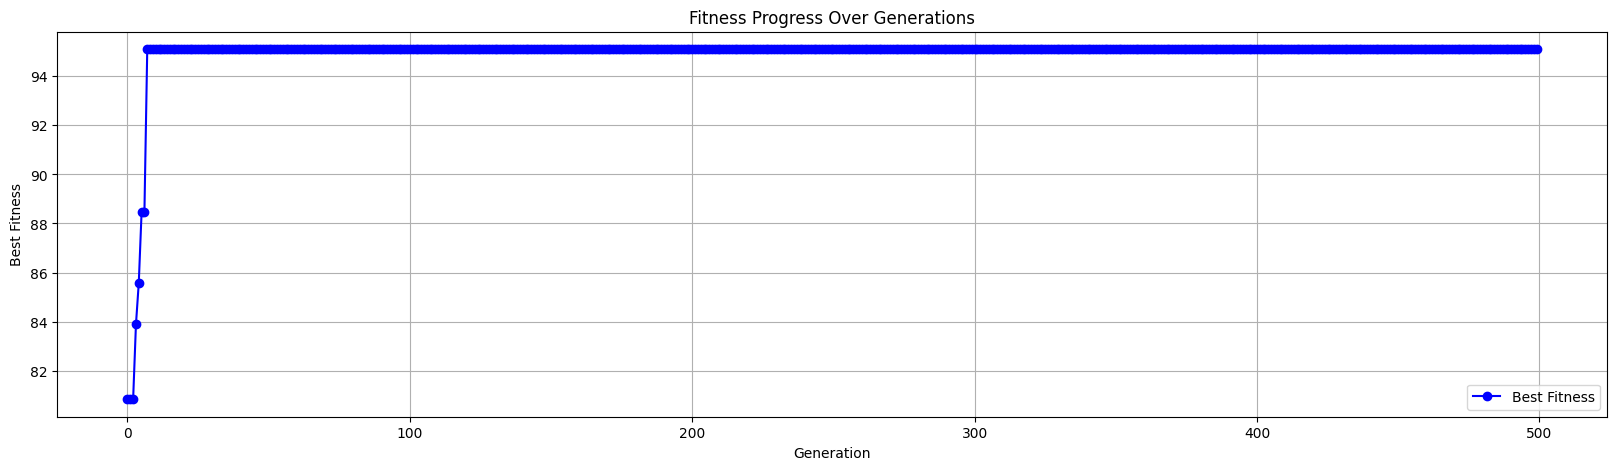

In [151]:
generations = list(range(len(fitness_history)))
plt.figure(figsize=(20, 5))
plt.plot(generations, fitness_history, marker='o', linestyle='-', color='b', label='Best Fitness')

plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Fitness Progress Over Generations")
plt.legend()
plt.grid(True)
plt.show()